Import Required Libraries ; Sorry for the messup of two chunks of same imports, just run it! :P

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('data.csv') #reading csv

<ipython-input-7-c39d5beb4006>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


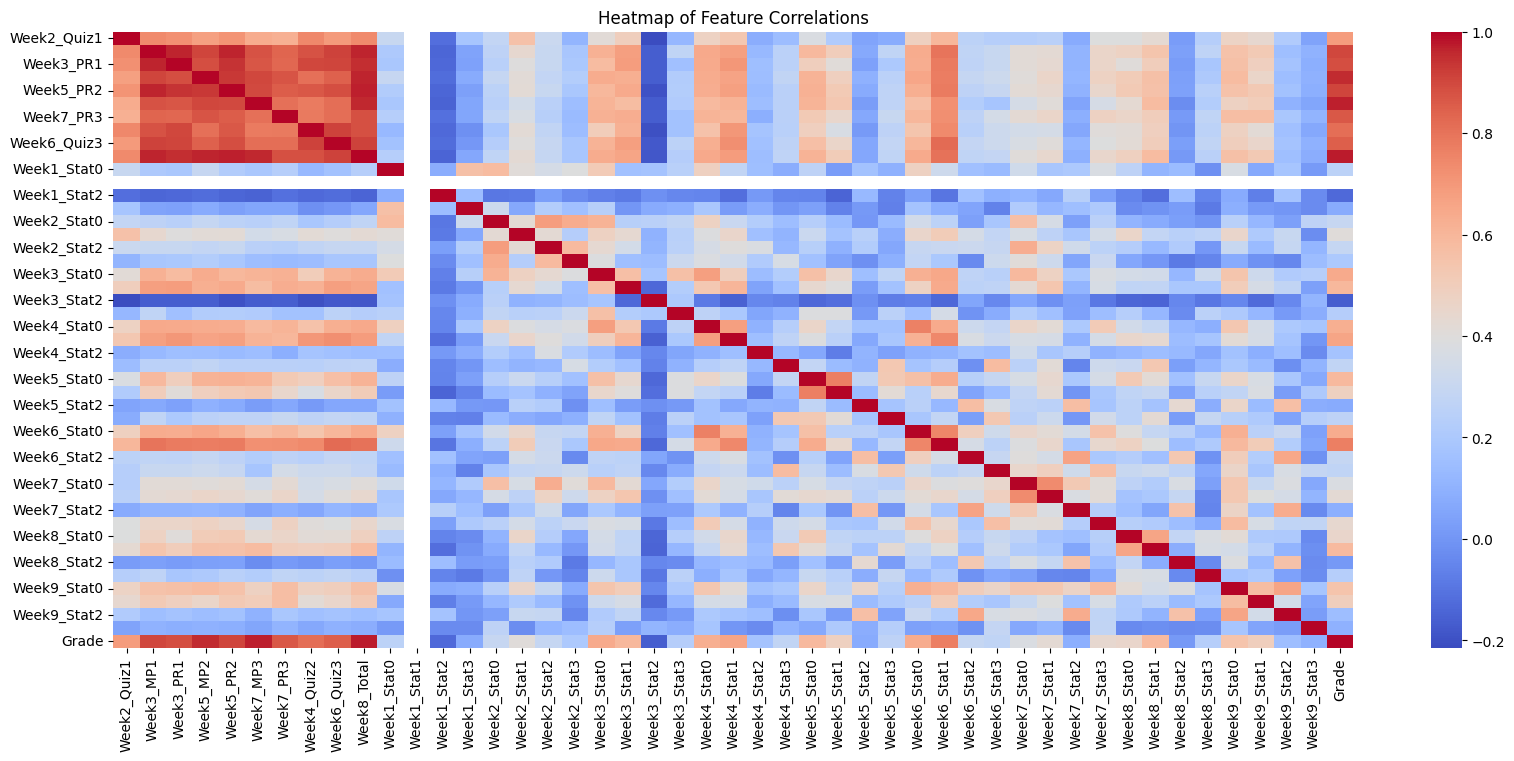

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()


# **Below has three different sets of features under X, I tried to comment which features works best and which not, please uncomment whatever feature you want to run**

In [ ]:
#X = data[['Week2_Quiz1','Week3_MP1','Week1_Stat2','Week6_Stat1','Week8_Total','Week1_Stat2']]  # ITS a good set of features but Week8_total is a big bias to the prediction.
#X = data[['Week2_Quiz1','Week3_MP1','Week1_Stat2','Week6_Stat1','Week1_Stat2', 'Week3_Stat0', 'Week8_Stat1','Week9_Stat1', 'Week4_Quiz2']] #Not good features
X = data[['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', "Week5_MP2", "Week5_PR2", "Week7_MP3",'Week7_PR3']] #This is what I found to be best features without the bias Week8 one
y = data['Grade']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


A test on Linear Regression and Random Forest

In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.08105729818655878
R-squared (R2): 0.9791216050125531


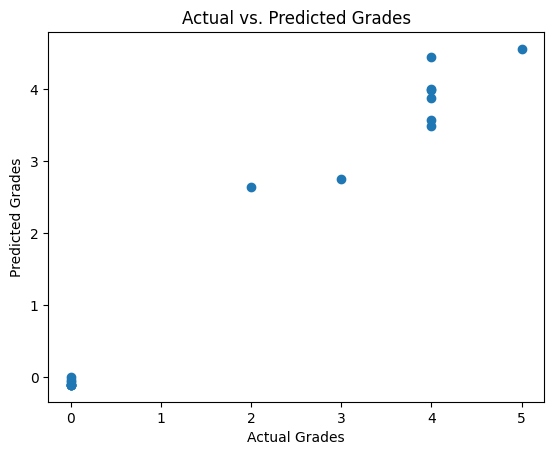

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs. Predicted Grades')
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.006388235294117631
R-squared (R2): 0.9983545454545455


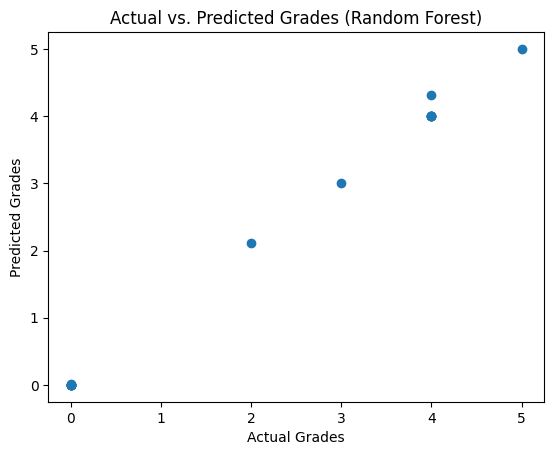

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs. Predicted Grades (Random Forest)')
plt.show()

Comparision of 4 models with same features and their accuracies

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

                    Model  Accuracy  Precision (weighted)  Recall (weighted)  \
0           Random Forest        76              0.867647           0.764706   
1     Logistic Regression        82              0.872549           0.823529   
2  Support Vector Machine        82              0.872549           0.823529   
3           Decision Tree        88              0.882353           0.882353   

   F1-score (weighted)  
0             0.768627  
1             0.821569  
2             0.821569  
3             0.869875  


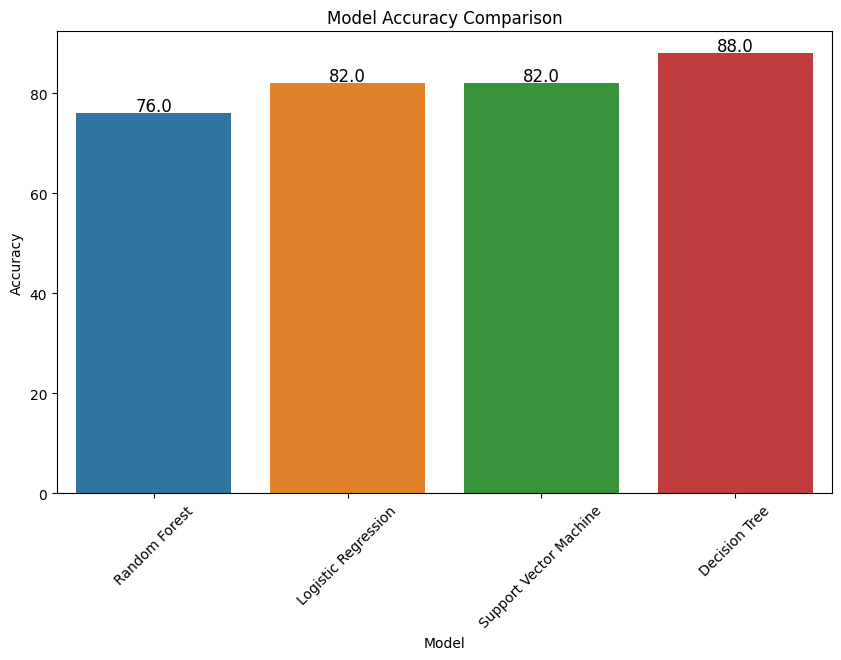

In [ ]:
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000)),
    ("Support Vector Machine", SVC(kernel="linear", C=1.0, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42))
]

results = []

# Train and evaluate each model
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and store classification report metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision (weighted)": report["weighted avg"]["precision"],
        "Recall (weighted)": report["weighted avg"]["recall"],
        "F1-score (weighted)": report["weighted avg"]["f1-score"]
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df['Accuracy'] = (results_df['Accuracy'] * 100).astype(int)
# Display results as a table
print(results_df)

# Create a bar plot to compare model performances
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

In [ ]:
X = data[['Week2_Quiz1','Week3_MP1','Week1_Stat2','Week6_Stat1','Week8_Total','Week1_Stat2']]  # ITS GUUUD
#X = data[['Week2_Quiz1','Week3_MP1','Week1_Stat2','Week6_Stat1','Week1_Stat2', 'Week3_Stat0', 'Week8_Stat1','Week9_Stat1', 'Week4_Quiz2']] #ITS MEH MEH
#X = data[['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', "Week5_MP2", "Week5_PR2", "Week7_MP3",'Week7_PR3']]
y = data['Grade']  # Replace with your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Comparision of the same 4 models with including the biased feature dataset for training USING **WEEK8_TOTAL**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    Model  Accuracy  Precision (weighted)  Recall (weighted)  \
0           Random Forest        94              0.911765           0.941176   
1     Logistic Regression        94              0.970588           0.941176   
2  Support Vector Machine        94              0.970588           0.941176   
3           Decision Tree       100              1.000000           1.000000   

   F1-score (weighted)  
0             0.921569  
1             0.948307  
2             0.948307  
3             1.000000  


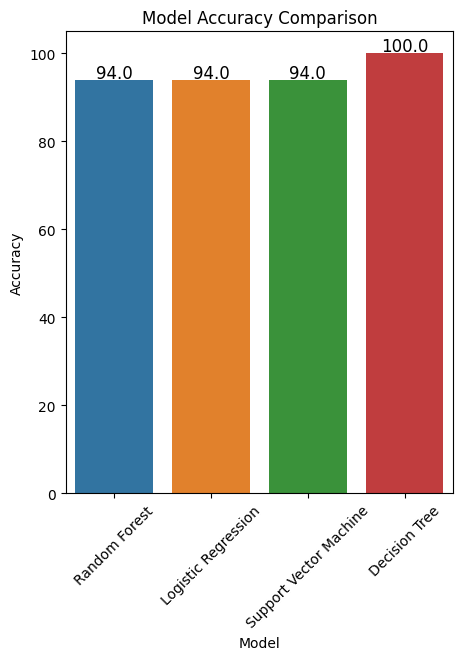

In [ ]:
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=10000)),
    ("Support Vector Machine", SVC(kernel="linear", C=1.0, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42))
]

results = []
# Train and evaluate each model
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and store classification report metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision (weighted)": report["weighted avg"]["precision"],
        "Recall (weighted)": report["weighted avg"]["recall"],
        "F1-score (weighted)": report["weighted avg"]["f1-score"]
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df['Accuracy'] = (results_df['Accuracy'] * 100).astype(int)
# Display results as a table
print(results_df)

# Create a bar plot to compare model performances
plt.figure(figsize=(5, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

**TEST OF PREDICTED POINTS AND REAL POINTS**

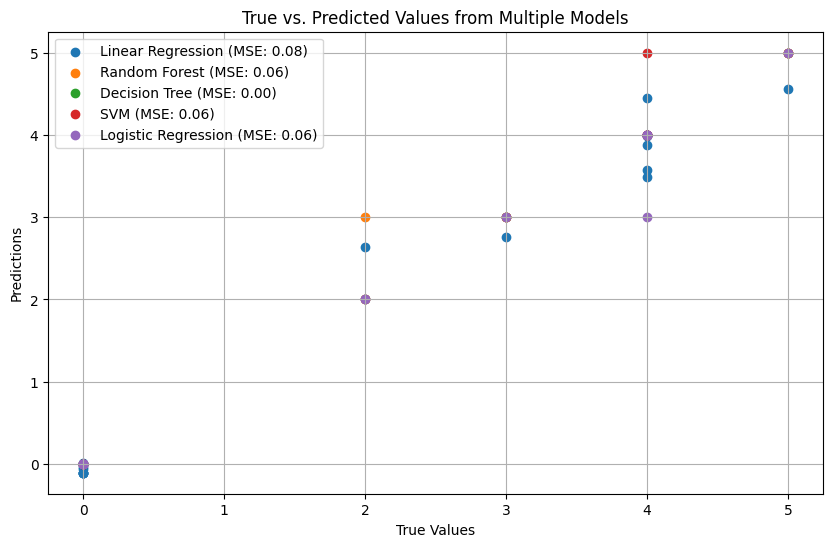

In [ ]:
models = [LinearRegression(), RandomForestClassifier(n_estimators=100, random_state=42), DecisionTreeClassifier(random_state=42), SVC(kernel="linear", C=1.0, random_state=42), LogisticRegression(random_state=42, max_iter=10000)]
model_names = ["Linear Regression", "Random Forest", "Decision Tree", "SVM", "Logistic Regression"]

plt.figure(figsize=(10, 6))

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Plot true vs. predicted values
    plt.scatter(y_test, y_pred, label=f'{model_name} (MSE: {mse:.2f})')

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values from Multiple Models")
plt.legend()
plt.grid(True)
plt.show()